# 2D Regression

Use pytorch to solve a 2d regression problem

In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from torchviz import make_dot

np.random.seed(42)

dtype = torch.float

BATCH_SIZE = 100
EPOCHS = 10000
LEARNING_RATE = 0.05
H = 100   # hidden layer size

DIM_IN = 2

## Generate data and set up network

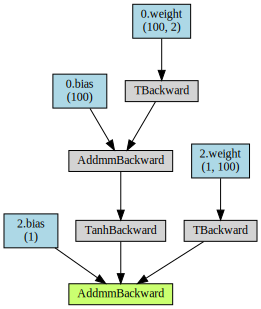

In [2]:
# Data
x_np = -2 + 4 * np.array(np.random.rand(BATCH_SIZE, DIM_IN))
y_np = np.sin(np.sqrt(x_np[:,0]**2 + x_np[:,1]**2)) + 0.1*np.array(np.random.rand(BATCH_SIZE))

x = torch.tensor(x_np, dtype=dtype)
y = torch.tensor(y_np.reshape(-1,1), dtype=dtype)

# Architecture
net = torch.nn.Sequential(
    torch.nn.Linear(DIM_IN, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, 1)
)

# Loss and optimizer selections
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE)

make_dot(net(x), params=dict(net.named_parameters()))

## Optimize model

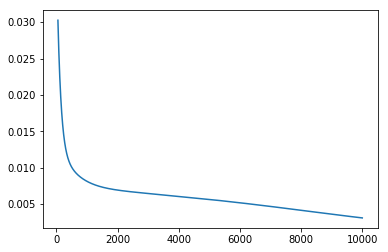

In [3]:
# Single-batch gradient descent in multiple episodes
loss_vec = []
for epoch in range(EPOCHS):
    # Zero the gradients
    optimizer.zero_grad()      
    
    # Forward pass for loss
    loss = criterion(net.forward(x), y)
    loss_vec.append(loss)
    
    # Backward pass for gradients
    loss.backward()

    # Gradient descent
    optimizer.step()
    
plt.figure()
plt.plot(range(50, len(loss_vec)), loss_vec[50:])
plt.show()

## Visualize results

<IPython.core.display.Javascript object>


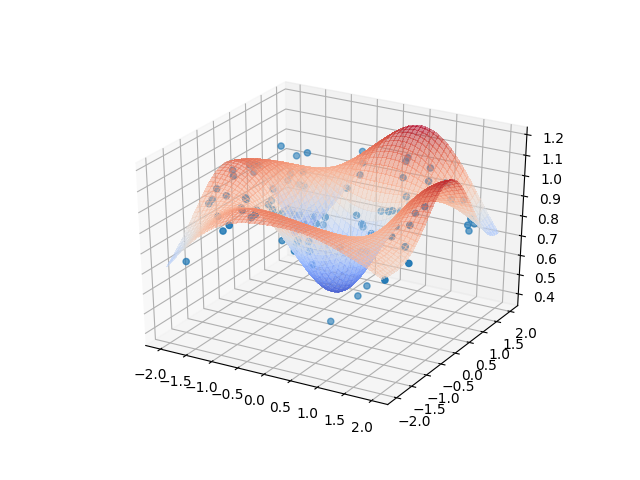

In [4]:
%matplotlib notebook

## VISUALIZE        
X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))

X_trch = torch.tensor(np.hstack([X.reshape((-1, 1)), Y.reshape((-1, 1))]), dtype=dtype)

Z = net(X_trch).detach().numpy().reshape((100, 100))

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,
                       alpha=0.5)

ax.scatter(x[:, 0], x[:, 1], y)
plt.show()